In [738]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
from sklearn.metrics import accuracy_score
from scipy import io
import os
import math
numpy.random.seed(42)

cwd = os.chdir('/Users/ernestng/Desktop/NUS/Y2S2/DSA3102/HMWK2')
data = io.loadmat('emaildata.mat')
ytrain = data['ytrain']  # shape = (3065,1)
ytest = data['ytest']
xtrain = data['Xtrain']  # shape = (3065,57)
xtest = data['Xtest']
# w = np.zeros((57,1)) #shape = (57,1)
theta = 0.05


def prediction(w, Data):
    pred = []
    z = np.dot(w.T, Data.T)
    a = sigmoid(z)
    for i in range(0, len(a[0])):
        if (a[0][i] > 0.5):
            pred.append(1)
        elif (a[0][i] <= 0.5):
            pred.append(-1)
    return pred


def sigmoid(x):
    a = 1/(1+np.exp(-x))
    return a


def obj(y, w, X):  # scalar
    z = np.dot(X, w)
    val = -np.multiply(y, z)
    fx = np.sum(np.log(1+np.exp(val))) + theta*np.sum(np.abs(w))
    return fx


def grad(y, w, X):  # shape = (1,57)
    z = np.dot(X, w)
    val = np.multiply(y, z)
    denom = -y/(1 + np.exp(val))
    gradient = np.dot(denom.T, X)
    return gradient


def proxMap(L, w):  # shape = (1,57)
    return np.sign(w)*np.maximum(np.zeros(np.shape(w)), np.abs(w)-theta/L)


X = xtrain
y = ytrain
tol = 0.001
fx_lst = []
fx_lst_acc = []
mom = []
acc = []
gw = []
mom_acc = []
acc_acc = []
gw_acc = []
steps = []
count = 0
count_acc = 0
maxit = 5000
# Momentum
tOld = 1
tNew = 1
beta = 0
# Initialize w to be zero
wOld = np.zeros((57, 1))
w_array = np.array(wOld)
wBar = wOld
wpd = wOld.copy()
wpdBar = wpd
# L is Lipshitz constant
L = 0.5 * (np.linalg.norm(xtrain)**2) * 0.8
while True:
    while count < maxit:
        fx = obj(y, wpd, X)  # Function value
        gradwBar = grad(y, wpdBar, X)  # Gradient at wBar
        w = proxMap(L, wpdBar - gradwBar.T/L)  # Proximal mapping of g
        gradw = grad(y, w, X)  # Gradient at next w
        #err = np.sum((w - proxMap(np.ones((58, 1)), w - gradw))**2)**0.5
        # Change in function value from w to next w
        f_change = np.linalg.norm(obj(y, w, X) - obj(y, wpd, X))
        err3 = np.linalg.norm(gradw)  # 2-norm of gradient
        step_change = np.linalg.norm(w - wpd)

        
        # Iterate for next w
        wpdBar = w+(w-wpd)
        gradwBar = grad(y, wpdBar, X)
        wpd = w
        w = proxMap(L, wpdBar - gradwBar.T/L)
        gradw = grad(y, w, X)
        fx = obj(y, w, X)
        fx_lst.append(fx)
        #err = np.sum((w - proxMap(np.ones((58, 1)), w - gradw))**2)**0.5
        step_change = np.linalg.norm(w-wpd)
        f_change = np.linalg.norm(obj(y, w, X) - obj(y, wpd, X))
        err3 = np.linalg.norm(gradw)
        gw.append(err3)
        count += 1
        ypred = prediction(w, xtest)
        score = accuracy_score(ytest, ypred)*100
        acc.append(score)
        #print("Count", count, "step_change", step_change,"grad", err3, "accuracy", score)
    while count_acc < maxit:
        fx = obj(y, wOld, X)  # Function value
        gradwBar = grad(y, wBar, X)  # Gradient at wBar
        w = proxMap(L, wBar - gradwBar.T/L)  # Proximal mapping of g
        gradw = grad(y, w, X)  # Gradient at next w
        #err = np.sum((w - proxMap(np.ones((58, 1)), w - gradw))**2)**0.5
        # Change in function value from w to next w
        f_change = np.linalg.norm(obj(y, w, X) - obj(y, wOld, X))
        err3 = np.linalg.norm(gradw)  # 2-norm of gradient
        step_change = np.linalg.norm(w - wOld)
        # Update momentum
        beta = (tOld-1)/tNew
        tOld = tNew
        tNew = 0.5 + 0.5*np.sqrt(1+4*(tOld**2))
        # Iterate for next w
        wBar = w+(w-wOld)*beta
        mom_acc.append(beta)
        gradwBar = grad(y, wBar, X)
        wOld = w
        w = proxMap(L, wBar - gradwBar.T/L)
        gradw = grad(y, w, X)
        fx = obj(y, w, X)
        fx_lst_acc.append(fx)
        #err = np.sum((w - proxMap(np.ones((58, 1)), w - gradw))**2)**0.5
        step_change_acc = np.linalg.norm(w-wOld)
        f_change = np.linalg.norm(obj(y, w, X) - obj(y, wOld, X))
        err3 = np.linalg.norm(gradw)
        gw_acc.append(err3)
        count_acc += 1
        ypred = prediction(w, xtest)
        score = accuracy_score(ytest, ypred)*100
        acc_acc.append(score)
        steps.append(step_change_acc)
        #print("Count", count, "step_change", step_change,"grad", err3, "accuracy", score)
    rang = range(0, count)
    if step_change_acc < 1 and step_change < 1:
        break



Function change over number of iteration

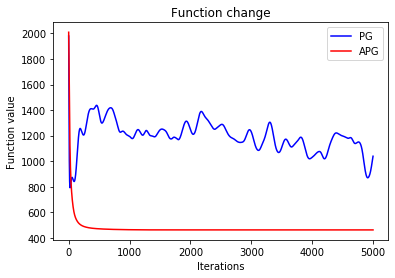

In [755]:
plt.plot(rang, fx_lst,"b", label="PG")
plt.plot(rang,fx_lst_acc,"r", label="APG")
plt.title('Function change')
plt.xlabel('Iterations')
plt.ylabel('Function value')
leg = plt.legend()
plt.show()

Accuracy for APG and PG over number of iterations

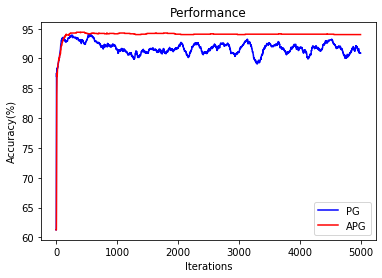

In [756]:
plt.plot(rang,acc,"b",label="PG")
plt.plot(rang,acc_acc,"r",label="APG")
plt.title('Performance')
plt.xlabel('Iterations')
plt.ylabel('Accuracy(%)')
leg = plt.legend()
plt.show()

Gradient change for APG and PG

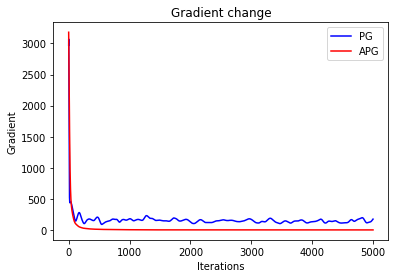

In [741]:
plt.plot(rang,gw,"b",label="PG")
plt.plot(rang,gw_acc,"r",label="APG")
plt.title('Gradient change')
plt.xlabel('Iterations')
plt.ylabel('Gradient')
leg = plt.legend()
plt.show()

Misclassification rate of APG

In [752]:
100-acc_acc[-1]

5.989583333333343

Misclassification rate of PG

In [753]:
100-acc[-1]

9.114583333333343